<a href="https://colab.research.google.com/github/Sherif-Elfiky/CSE151AProj/blob/main/151AProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# set up environment
!git clone https://github.com/Sherif-Elfiky/CSE151AProj.git

fatal: destination path 'CSE151AProj' already exists and is not an empty directory.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# read data
data = pd.read_csv('CSE151AProj/historical_data.csv')
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


**There are 197428 observations and 16 features**

In [13]:
# convert values for features created_at and actual_delivery_time from strings to datetime
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [14]:
# create new feature time_to_deliver, which represents the actual duration the order takes as a datetime
data['time_to_deliver'] = pd.to_datetime(data['actual_delivery_time']) - pd.to_datetime(data['created_at'])
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07


Missing data for store_primary_category. Getting NaN values. On kaggle, it says its N/A, so we need to replace the missing values in the dataframe with N/A.

In [15]:
# replace observations with store_primary_category as NaN with N/A
data.fillna({'store_primary_category': 'N/A'})

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,N/A,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,N/A,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,N/A,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07


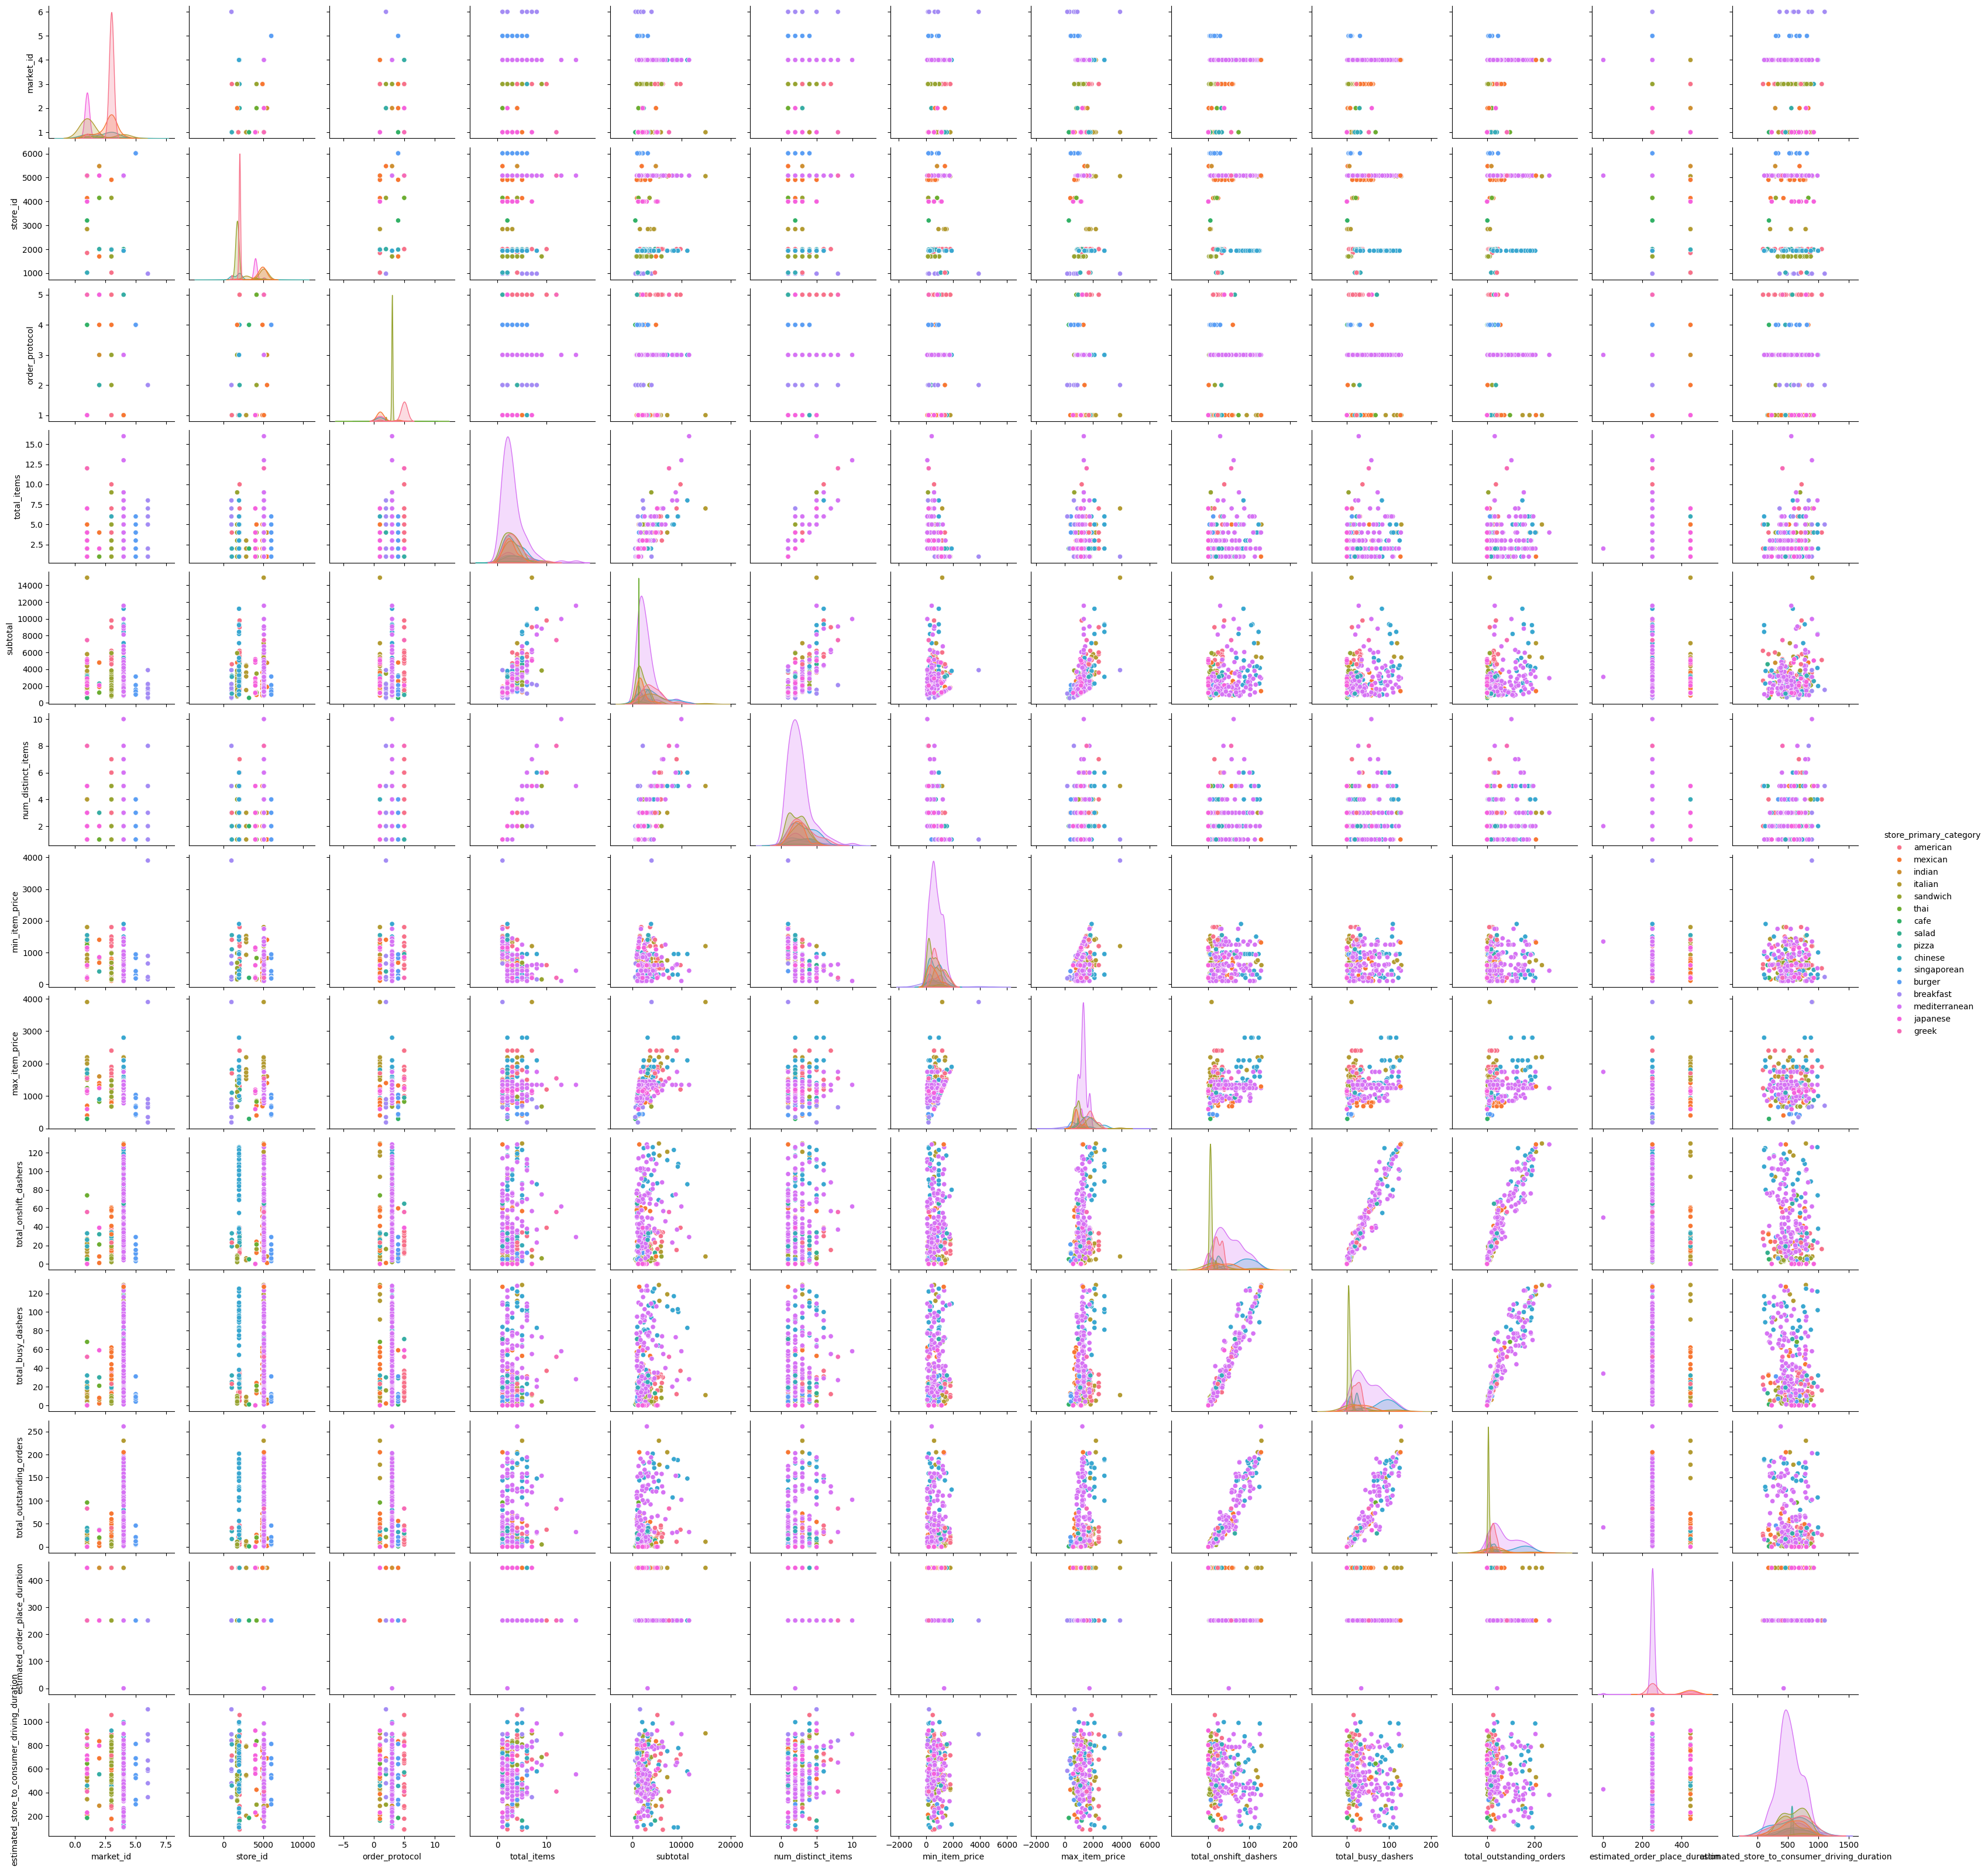

In [16]:
# let's visualize our data - only doing first 200 observations because of dataset size
sns.pairplot(data.head(300), hue = 'store_primary_category')

total_items, subtotal, and num_distinct_items seem normally distributed but skewed for some types of stores like mediterranean for example.

<Axes: >

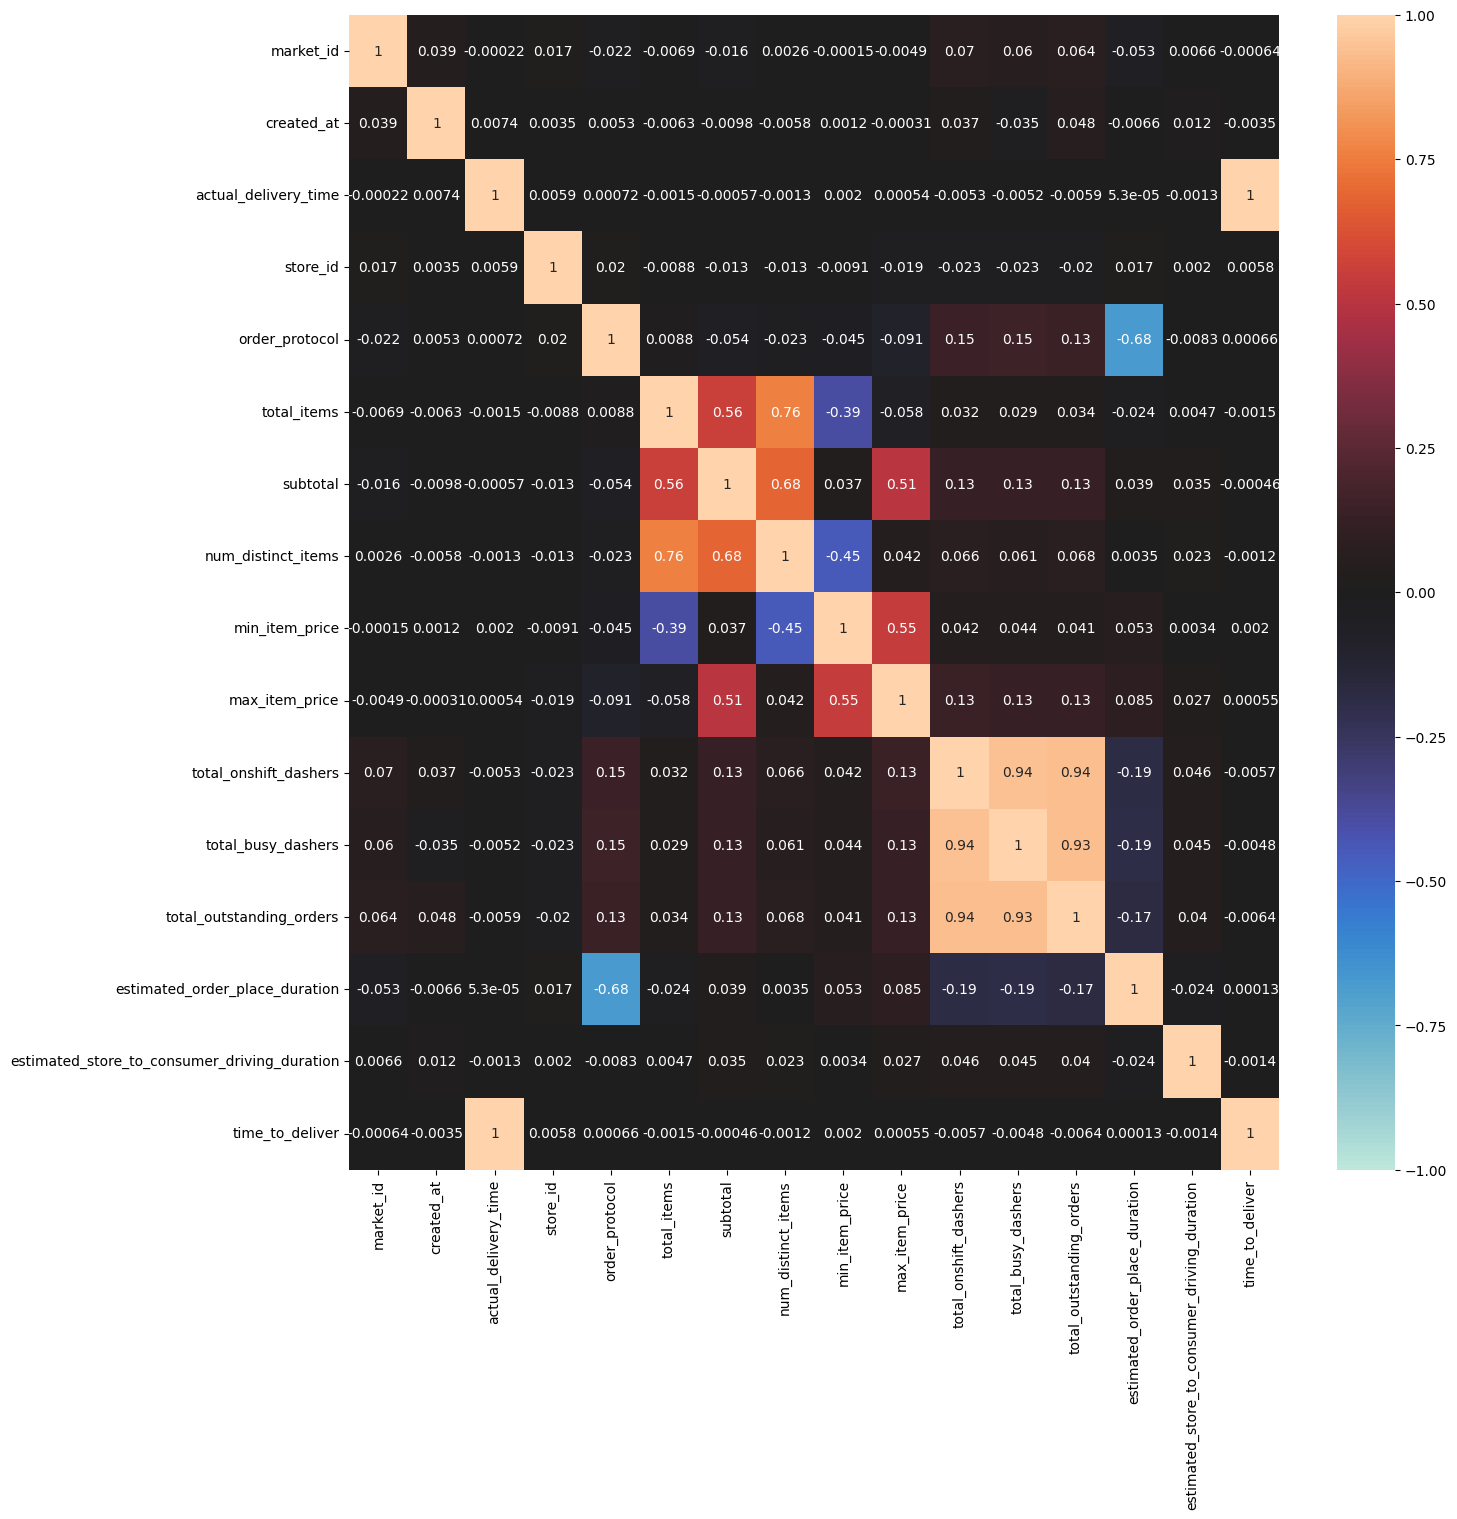

In [21]:
data = data.drop(['store_primary_category'], axis=1)
# find correspondance between features
corr = data.corr()
# plot heatmap with the correspondance values between two features
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)

Very high correspondance between total_onshift_dashers, total_busy_dashers, and total_outstanding_orders. This makes sense because there are going to be more orders going on and dashers busy when there are more dashers on shift.

## Data Preprocessing

In [109]:
# This section is the attempt at standardizing data of total_onshift_dashers and total_busy_dashers.
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime as ds
#column_names = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'time_to_deliver']


scaler = StandardScaler()
data_d = data[['total_onshift_dashers', 'total_busy_dashers', 'time_to_deliver']]
print(type(data_d['time_to_deliver']))
data_s = data_d['time_to_deliver'].dt.total_seconds()
print(data_s)

data_d['time_to_deliver'] = data_s
data_d['available_dashers'] = data_d['total_onshift_dashers'] - data_d['total_busy_dashers']
print(data_d)

# ignore rest of code below for now
data_d = data_d.dropna()
data_df = scaler.fit_transform(data_d)
data_df.shape
X = data_df[:, :1]
y = data_df[:, 2]



<class 'pandas.core.series.Series'>
0         3779.0
1         4024.0
2         1781.0
3         3075.0
4         2390.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: time_to_deliver, Length: 197428, dtype: float64
        total_onshift_dashers  total_busy_dashers  time_to_deliver  \
0                        33.0                14.0           3779.0   
1                         1.0                 2.0           4024.0   
2                         1.0                 0.0           1781.0   
3                         1.0                 1.0           3075.0   
4                         6.0                 6.0           2390.0   
...                       ...                 ...              ...   
197423                   17.0                17.0           3907.0   
197424                   12.0                11.0           3383.0   
197425                   39.0                41.0           3008.0   
197426                 

C:\Users\Kamri\AppData\Local\Temp\ipykernel_25772\2564930362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_d['time_to_deliver'] = data_s
C:\Users\Kamri\AppData\Local\Temp\ipykernel_25772\2564930362.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_d['available_dashers'] = data_d['total_onshift_dashers'] - data_d['total_busy_dashers']


In [85]:
X

array([-0.34199901, -1.26881828, -1.26881828, ..., -0.1682204 ,
       -1.09503967, -0.71851934])

In [86]:
y

array([-0.86293953, -1.2362405 , -1.29845733, ..., -0.02301236,
       -1.08069843, -0.67628905])

In [87]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train

array([-0.37096211, -0.11029419, -0.74748244, ..., -0.80540864,
       -0.71851934, -0.37096211])

In [89]:
X_test

array([ 0.70067267,  1.0482299 ,  2.4094957 , ..., -0.39992521,
        1.13511921, -1.29778138])

In [90]:
y_train

array([ 0.44361385, -0.27187967, -0.55185539, ..., -0.83183112,
       -0.67628905, -0.39631332])

In [91]:
y_test

array([ 0.59915592,  1.78127565,  0.81691482, ..., -0.30298808,
        1.25243262, -1.29845733])

Coefficients: 
 [[0.94315224]]


<Axes: >

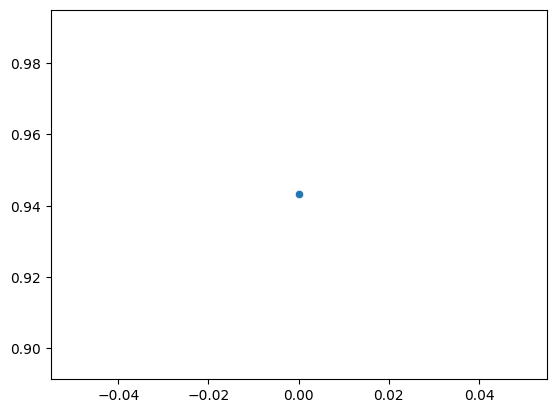

In [93]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
regmodel = reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
print('Coefficients: \n', regmodel.coef_)
sns.scatterplot(x=list(range(0,len(regmodel.coef_[0]))),y=regmodel.coef_[0])